# Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./Mall_Customers.csv")

# 1. EDA & PREPROCESSING

### 데이터 확인 및 column 파악

In [2]:
print(len(data))
data.head()
# 데이터 row 200개 
# CustomerID : Unique ID assigned to the customer
# Gender : Gender of the customer
# Age : Age of the customer
# Annual Income(k$) : Annual Income of the customer
# Spending Score(1~100) : Score assigned by the mall based on customer behavior and spending nature

200


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 결측치 확인 및 데이터 타입 확인

In [3]:
data.info() #결측치는 없고(굿굿) gender만 범주형 변수 나머지는 수치형 변수임을 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 데이터 분포 확인

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001375EA137F0>,
      dtype=object)

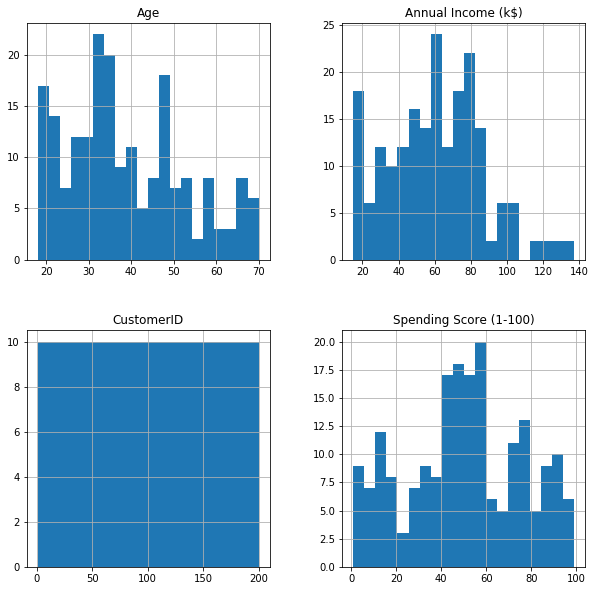

In [4]:
data.hist(bins=20, figsize=(10,10))
# customerID는 id라 의미없는 변수라 제거하고
# age는 어릴수록 많이 분포함을 볼 수 있고
# annualincome은 40 ~ 80사이에 많이 분포
# spending score는 정규분포모형처럼 40 ~ 60사이에 많이 분포함을 볼 수 있다.

In [5]:
data.drop(['CustomerID'], axis=1, inplace=True) # customerID제거

### 명목형 변수 gender 처리

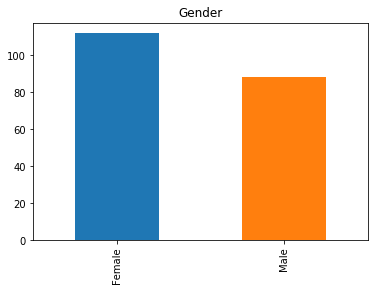

In [6]:
data['Gender'].value_counts().plot(kind='bar')
plt.title('Gender')
plt.show() # 6대4 정도로 보임을 알 수 있다.
data['Gender'] = data['Gender'].apply(lambda x:0 if x == "Female" else 1) #여자는 0 남자는 1로 만들어준다

### 클러스터링 하기 위해서는 거리기준으로 하니 데이터를 0~1 사이로 scaling 해 줄 필요가 있다.

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaler.fit(data)
scaledData = scaler.transform(data)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [8]:
# scaledData를 예쁘게 변환
scaledData = pd.DataFrame(scaledData)
scaledData.columns = data.columns

In [9]:
scaledData.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


# 2. Clustering

### K 군집 개수 정하기

Text(0.5, 1.0, 'Elbow curve')

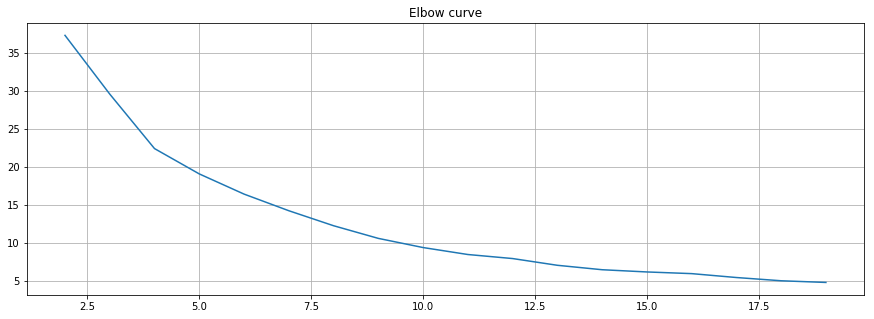

In [10]:
from sklearn.cluster import KMeans

distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaledData)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')
# 생각보다 완만한 그래프지만 급격히 꺽이는 지점은 3 ~ 4 정도로 추정된다. 5 ~ 7 사이가 적절한 k지점으로 생각된다.

### 2-1 hierarchical Clustering

single


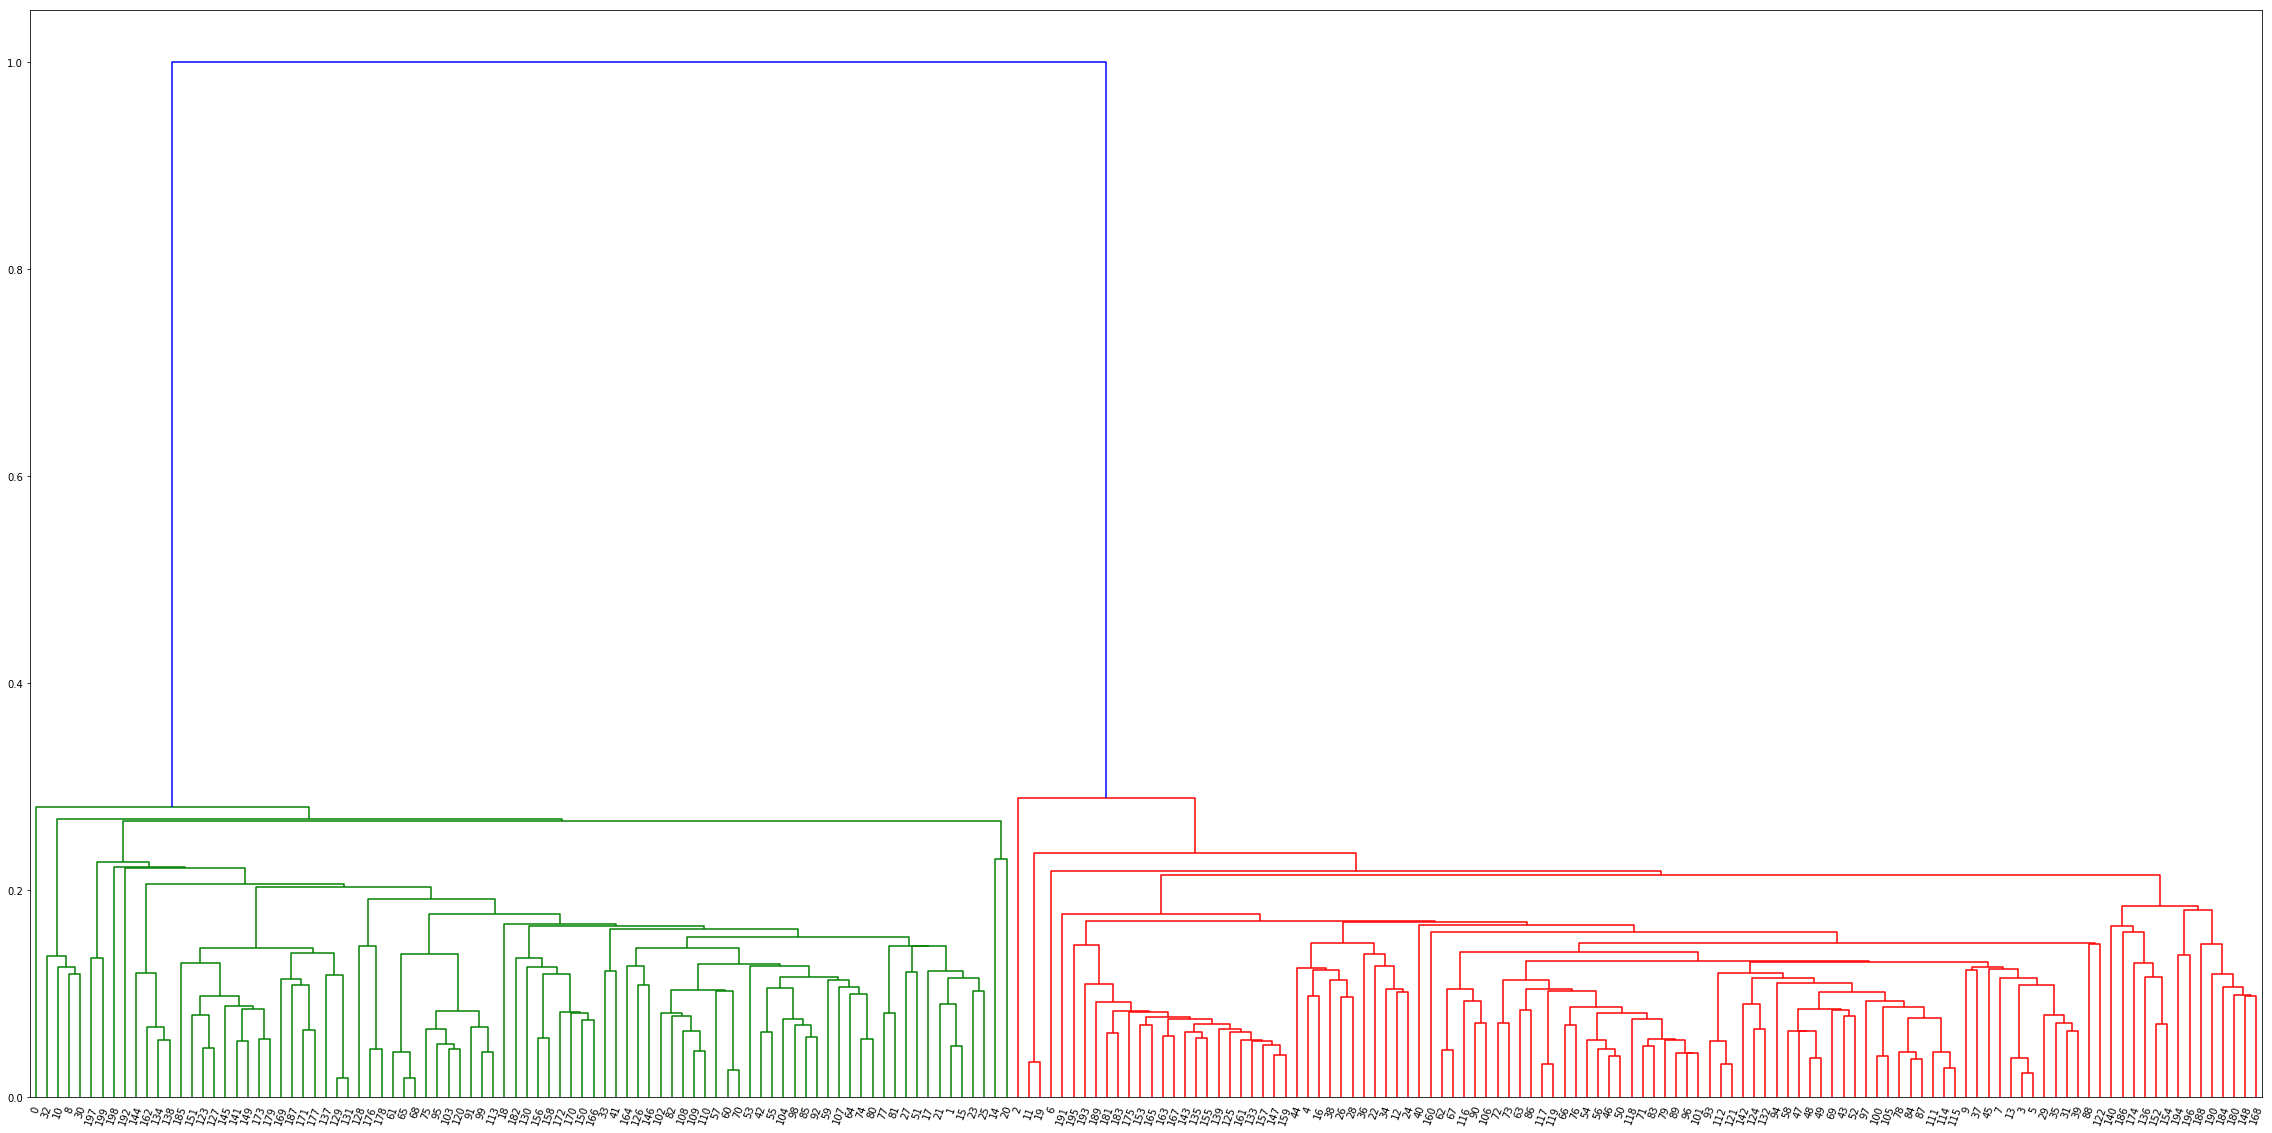

complete


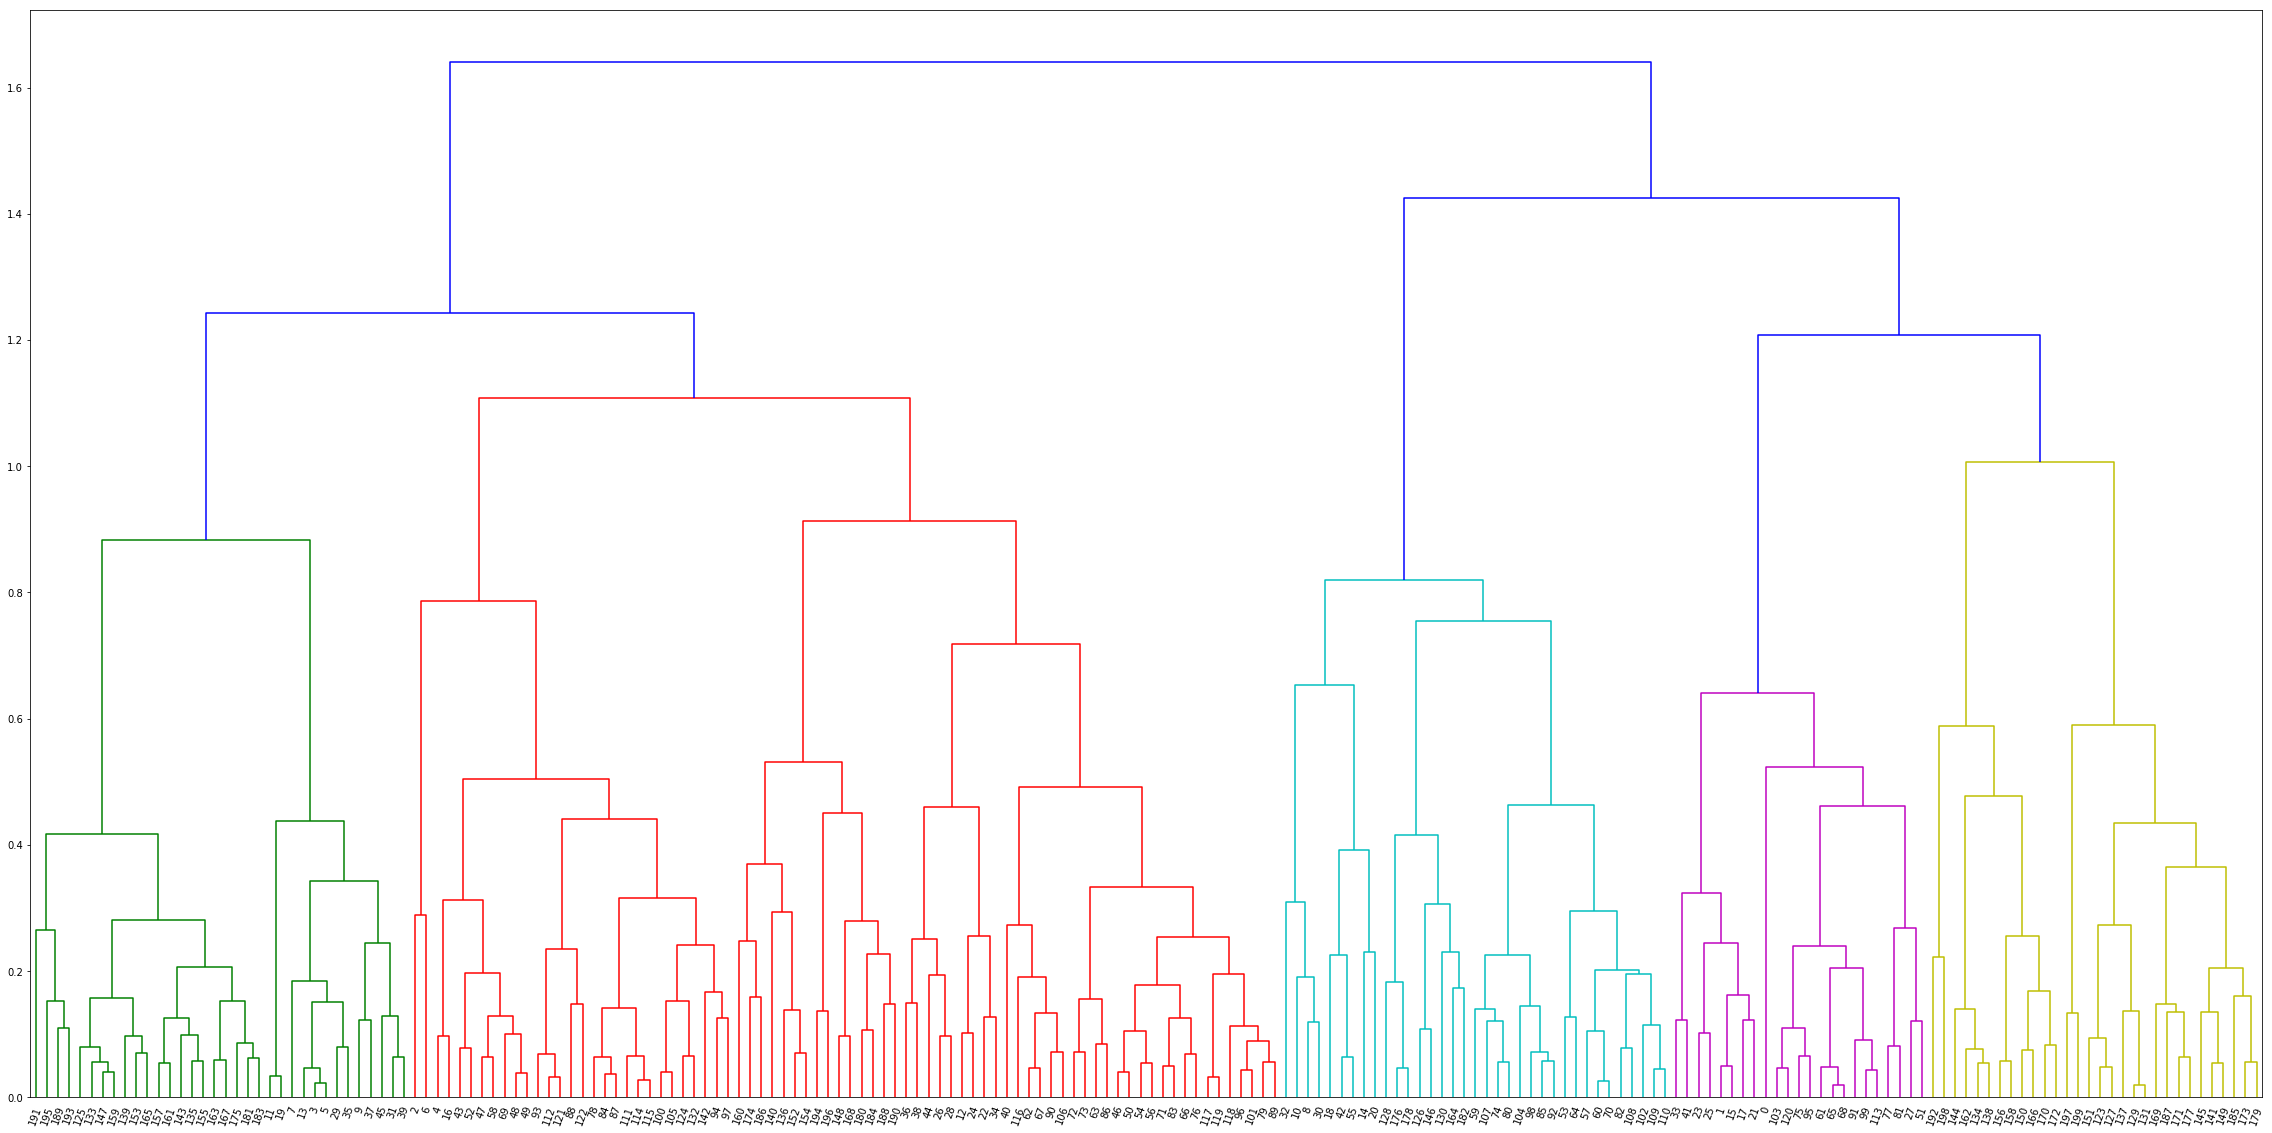

average


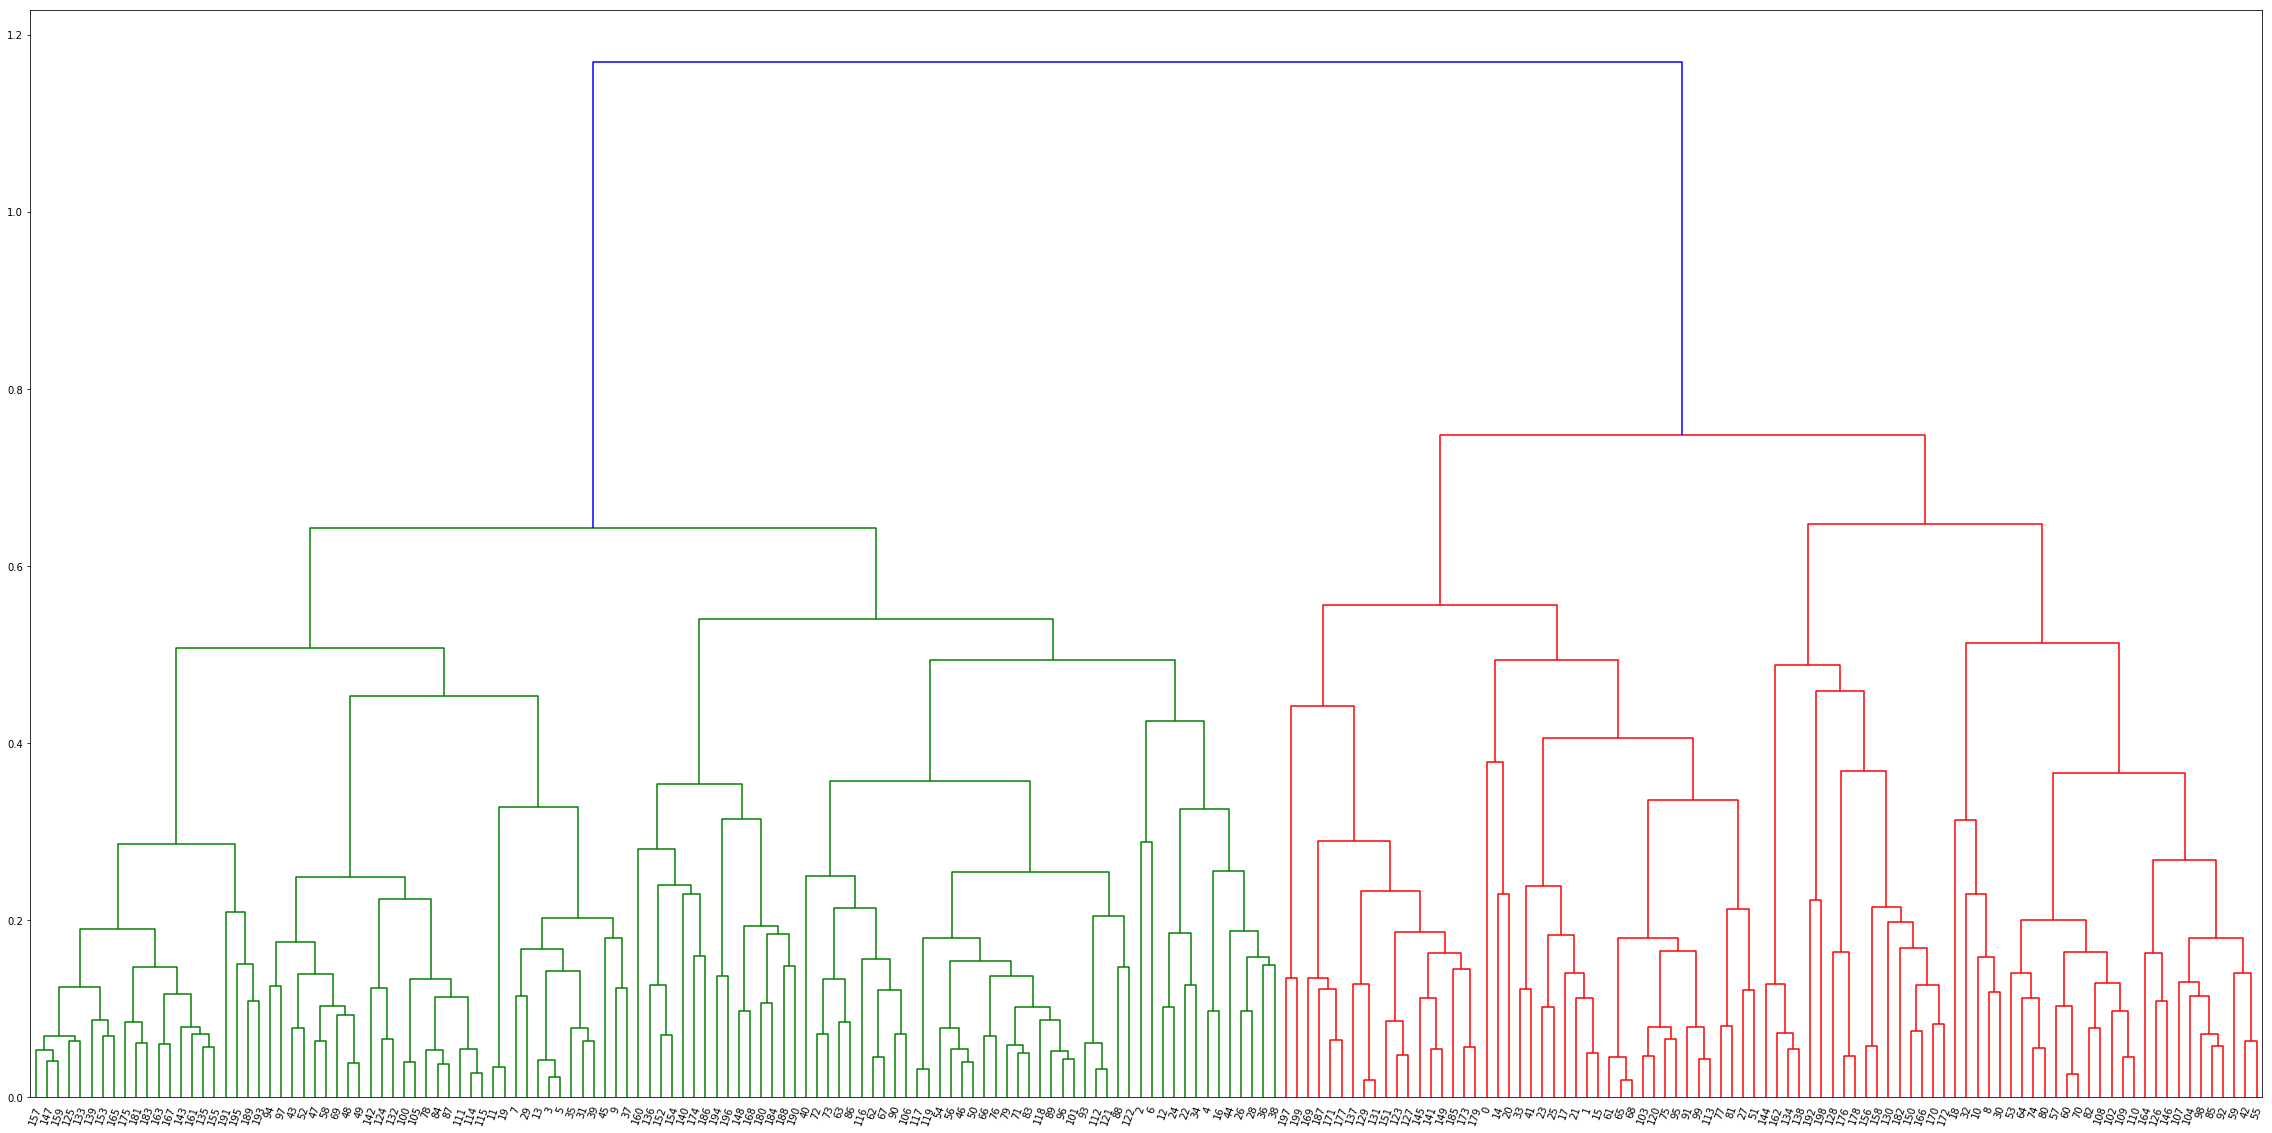

weighted


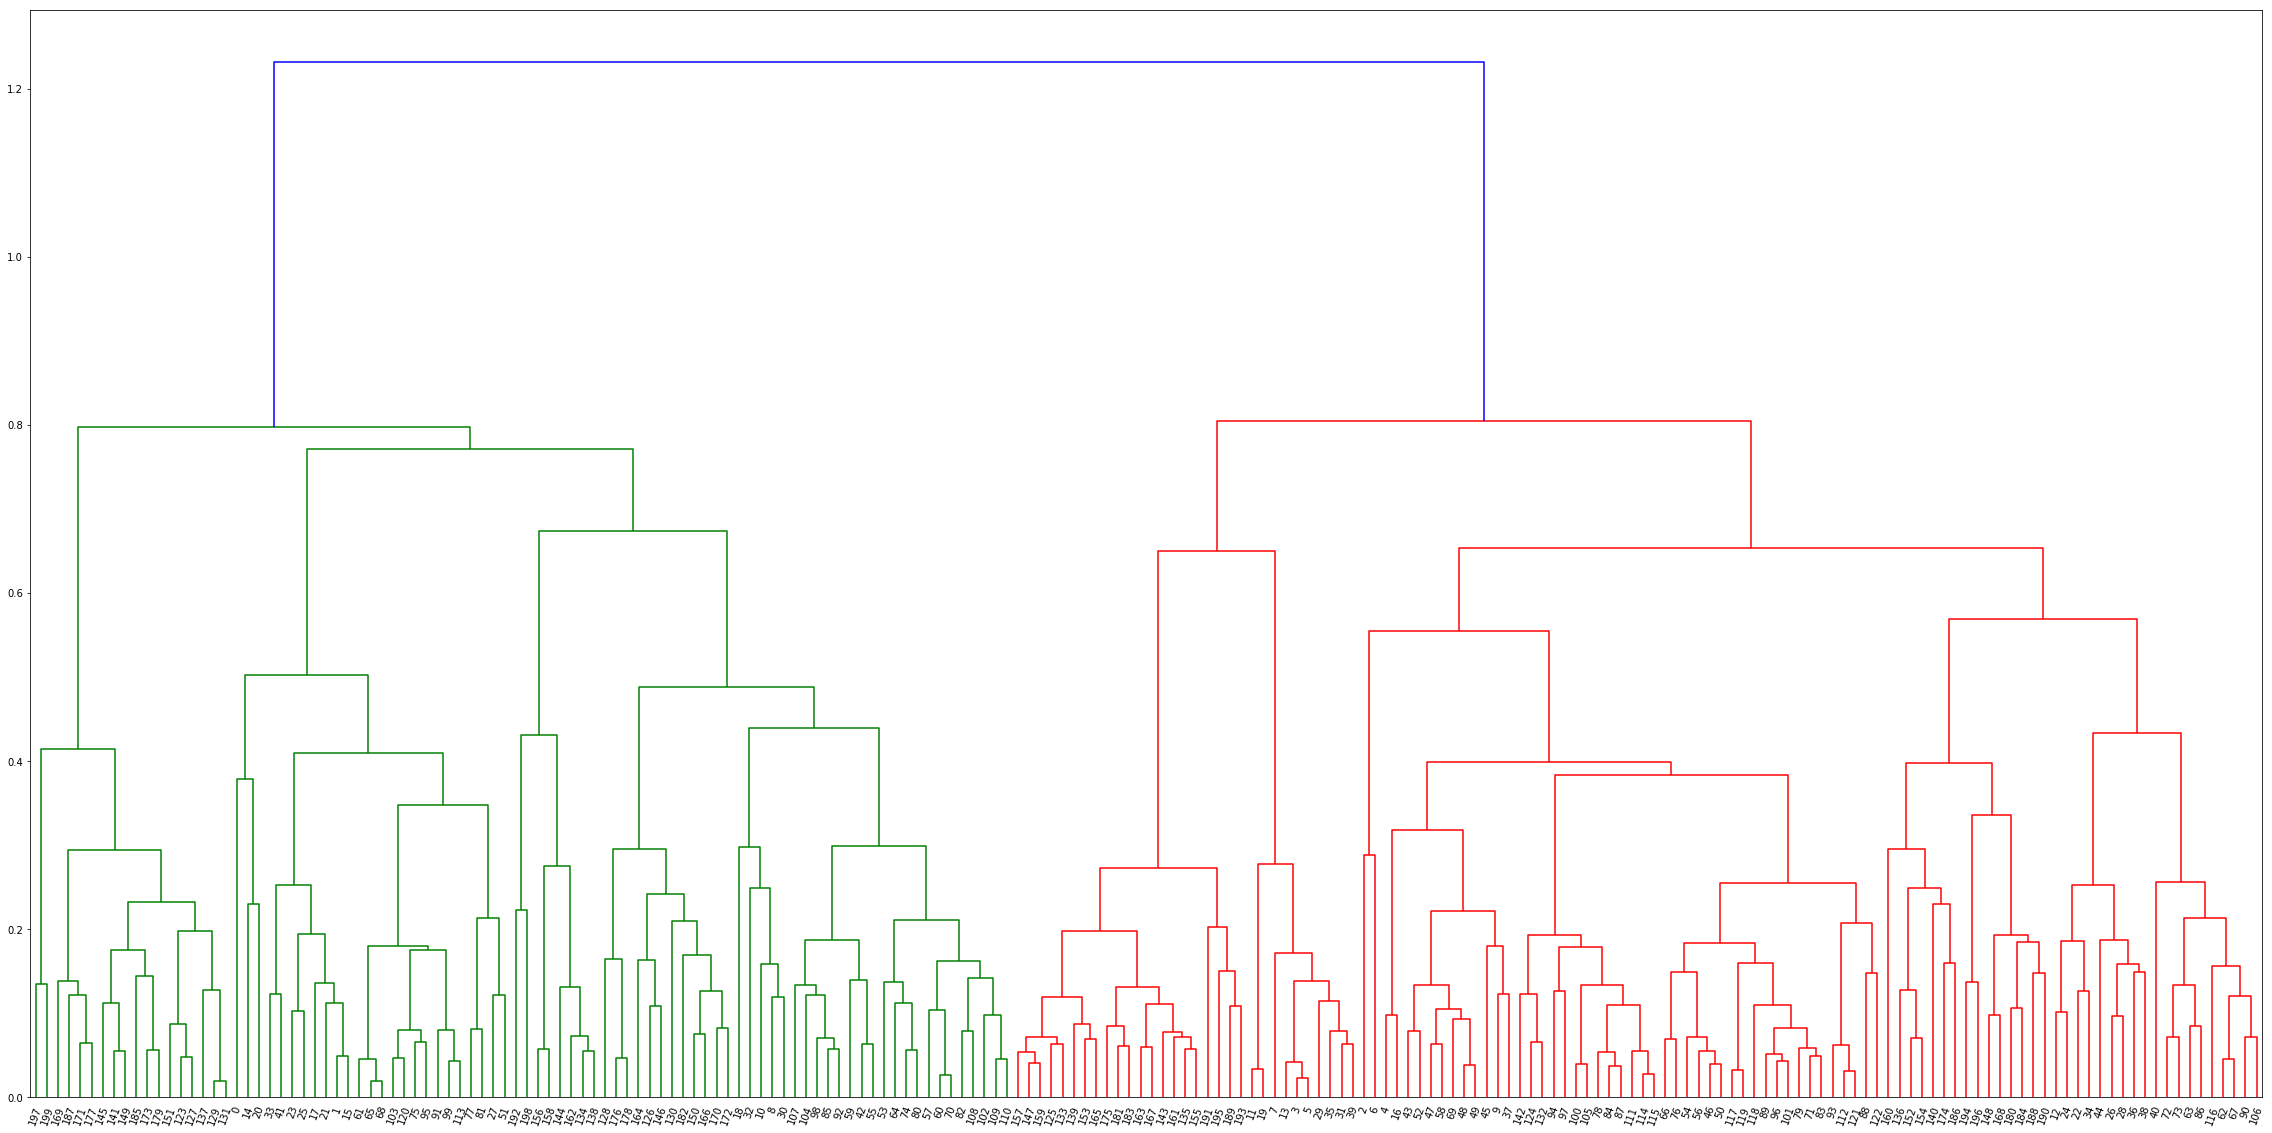

centroid


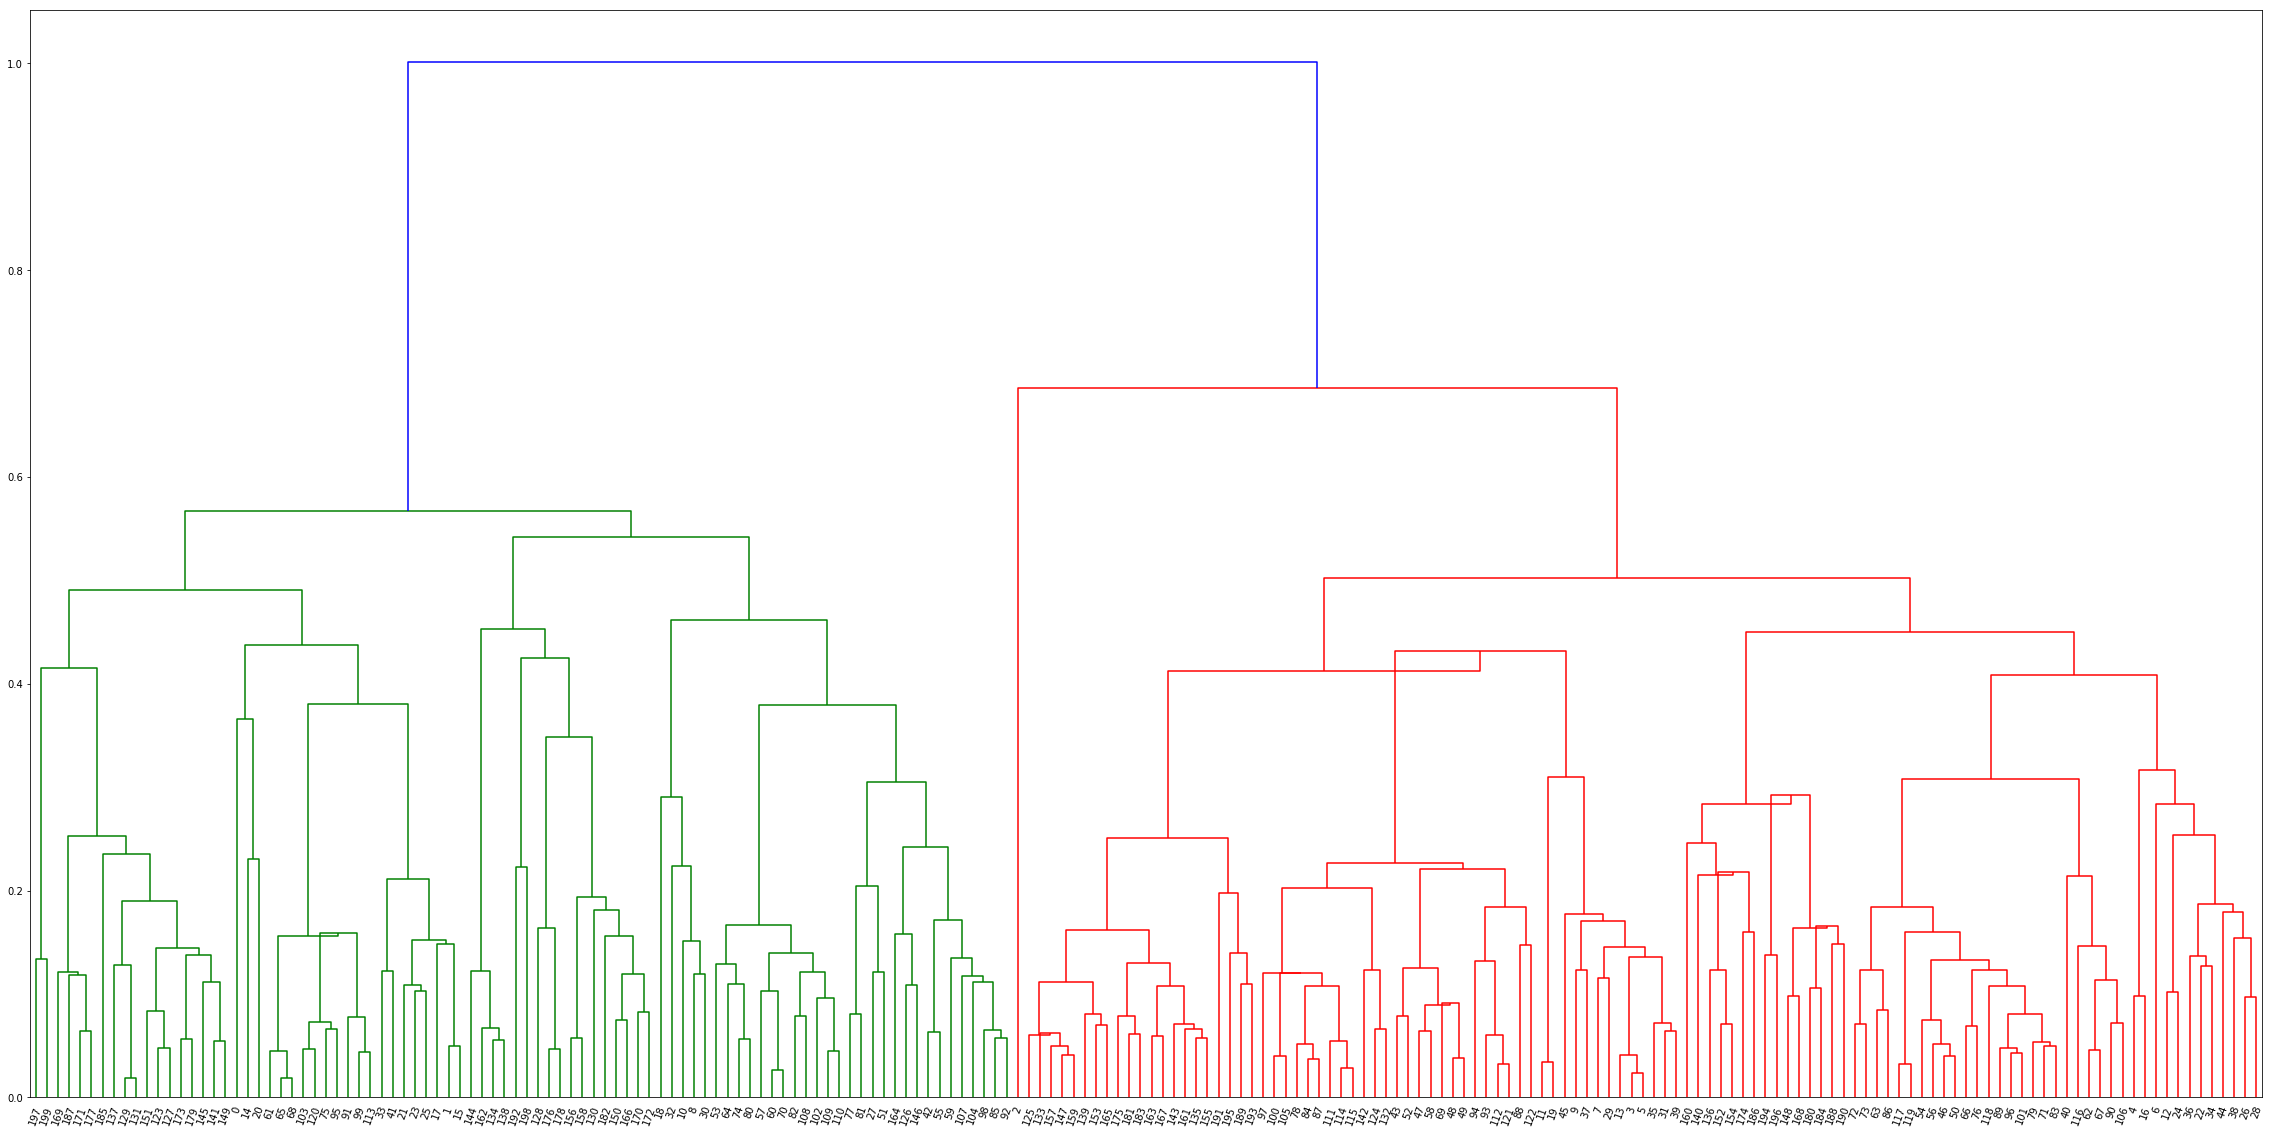

median


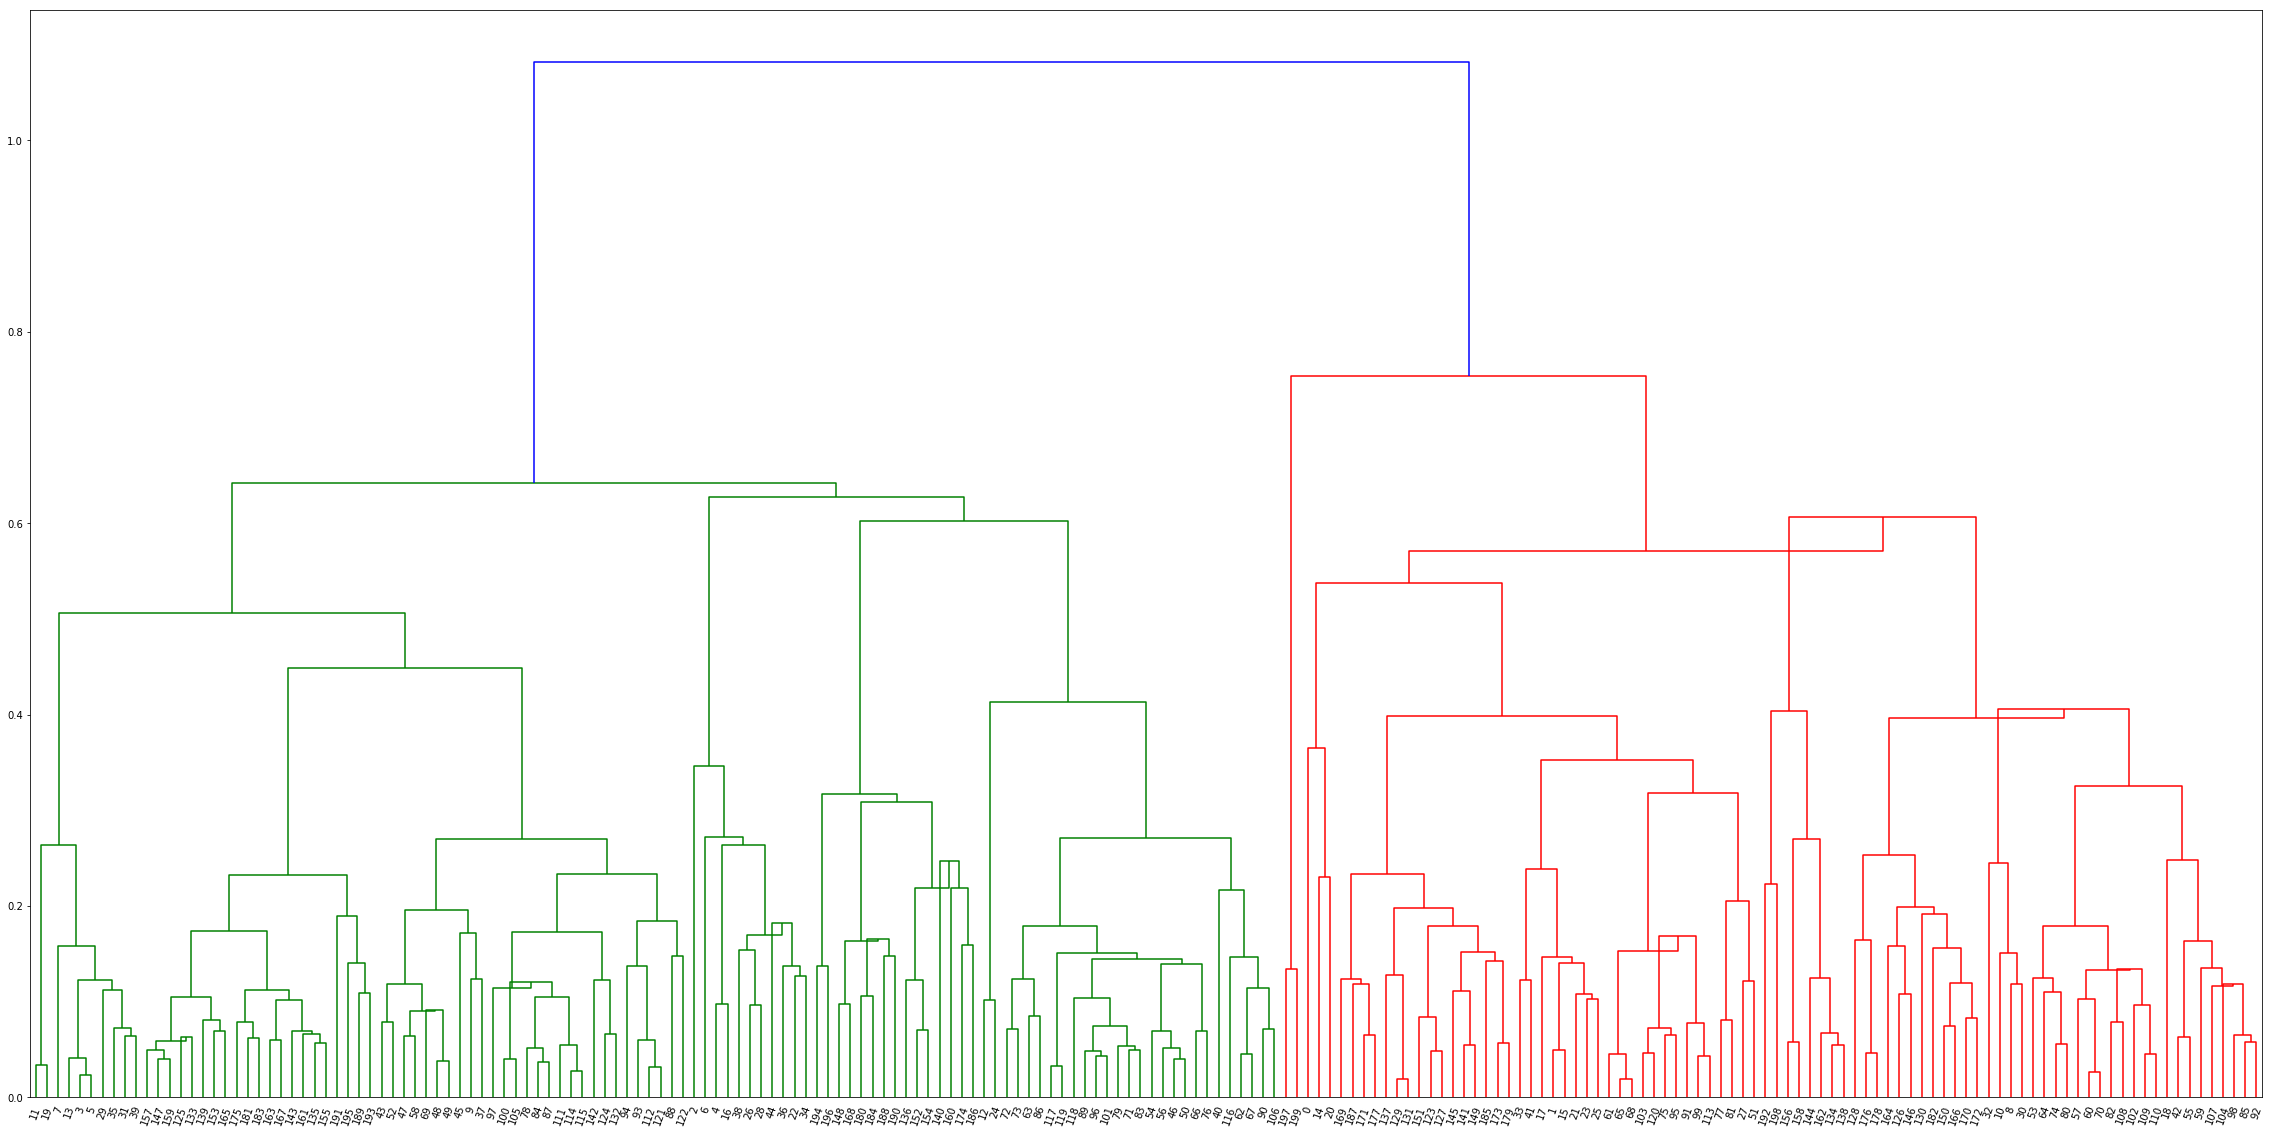

ward


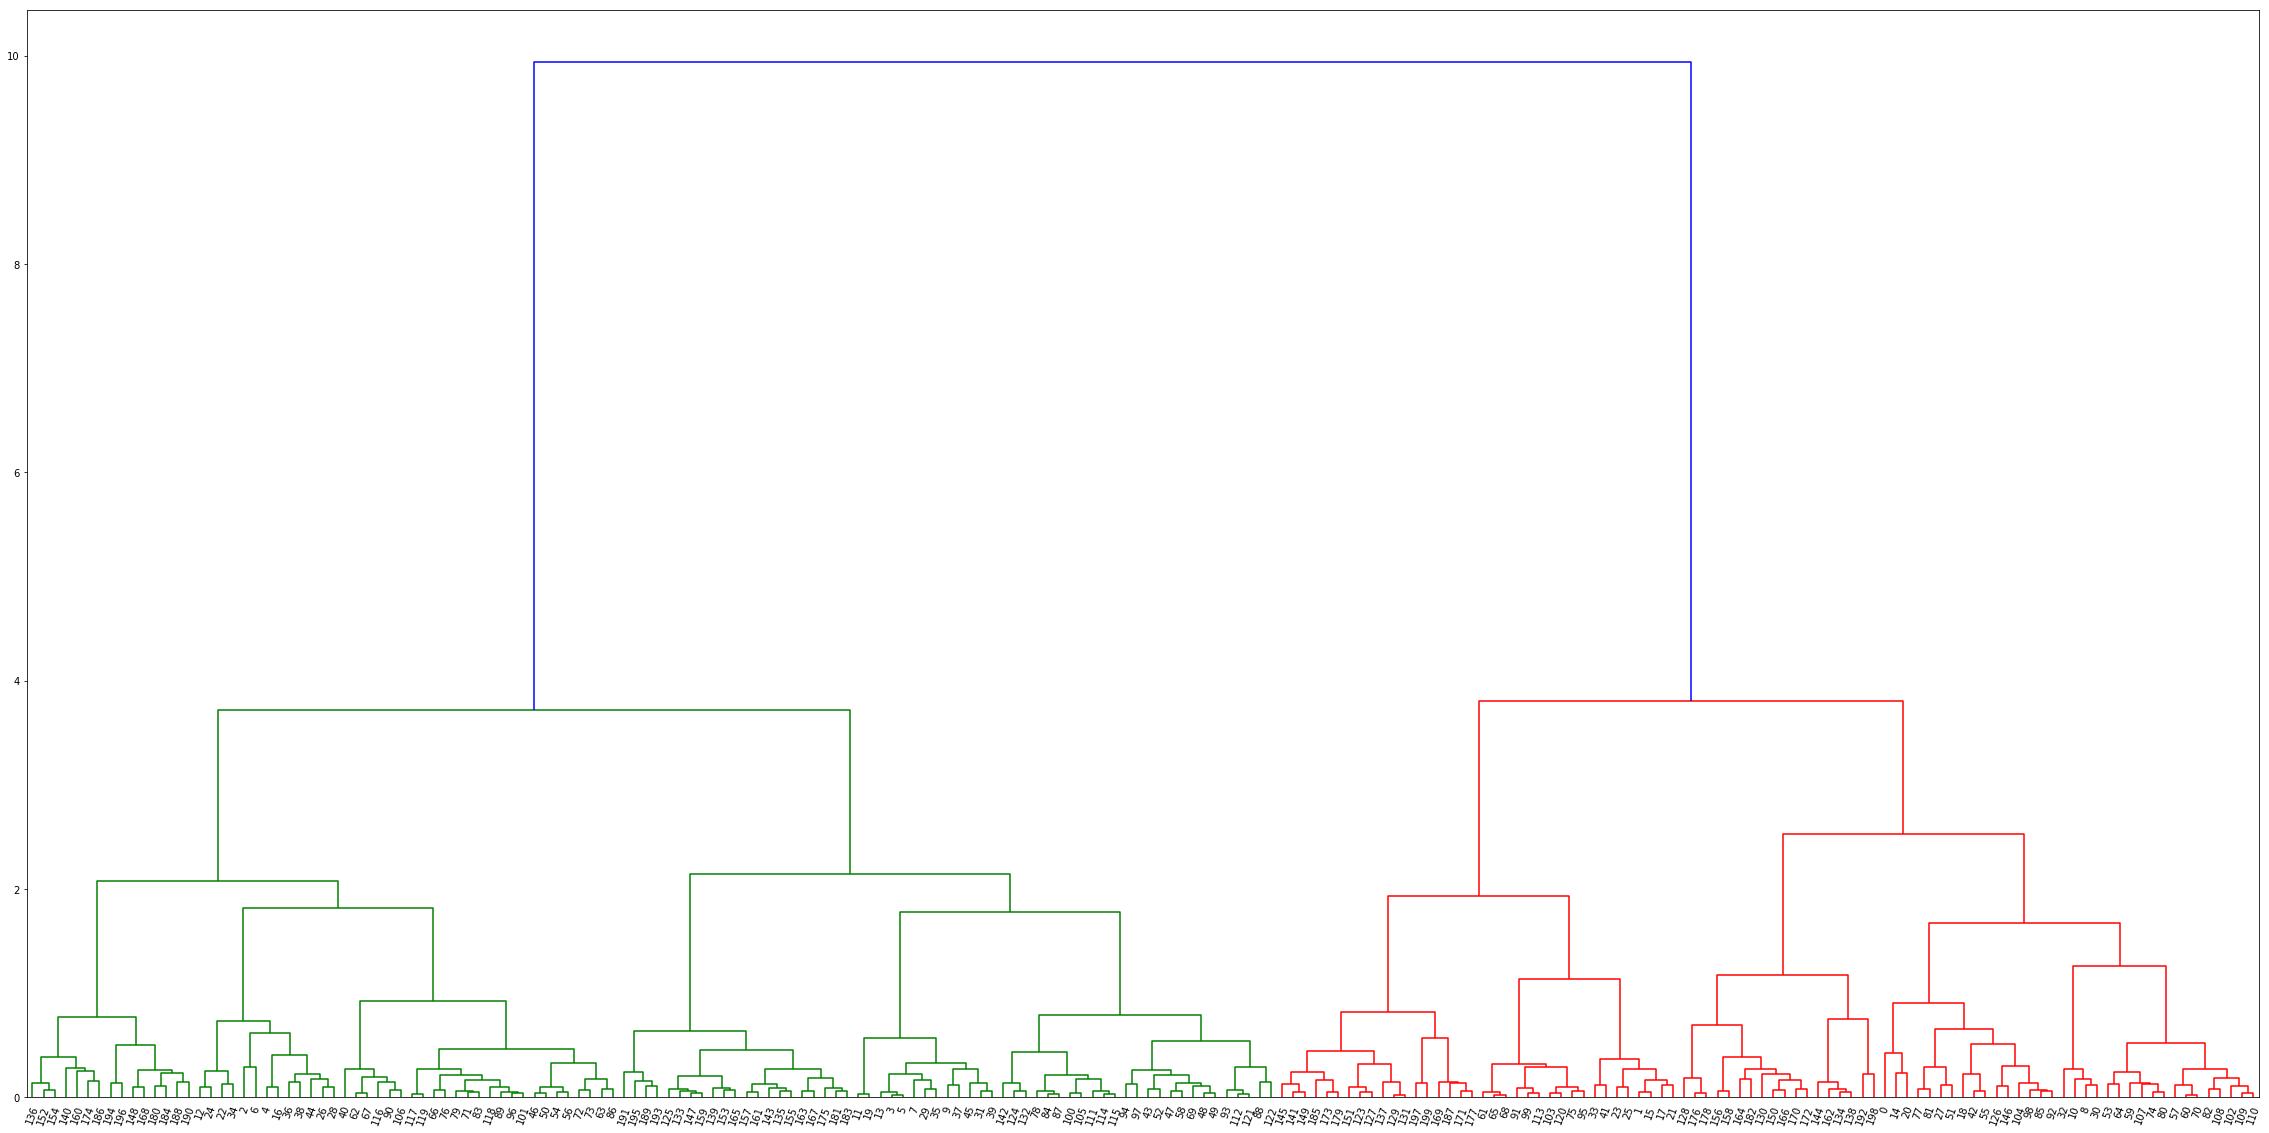

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram

methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']
# Min(Single Link)
# Max(Complete Link)
# Average

for M in methods:
    links = linkage(scaledData,method=M)


    # Plot the dendrogram
    plt.figure(figsize=(40,20))
    dendrogram(links,
        
               leaf_rotation=70,
               leaf_font_size=10,
    )
    print(M)
    plt.show()
# 거리측정 방법에 따라 클러스터링이 다양하게 되는 것을 볼 수 있다.

# 2-2. K-Means Clustering

In [12]:
#K-Means 군집 분석 
model = KMeans(n_clusters=5,algorithm='auto')
model.fit(scaledData)
predict = pd.DataFrame(model.predict(scaledData))
predict.columns=['predict']
# # predict 추가 
r = pd.concat([scaledData,predict],axis=1)

print(r['predict'].value_counts()) 
print(r)

0    57
4    55
3    42
2    29
1    17
Name: predict, dtype: int64
     Gender       Age  Annual Income (k$)  Spending Score (1-100)  predict
0       1.0  0.019231            0.000000                0.387755        3
1       1.0  0.057692            0.000000                0.816327        3
2       0.0  0.038462            0.008197                0.051020        4
3       0.0  0.096154            0.008197                0.775510        0
4       0.0  0.250000            0.016393                0.397959        0
5       0.0  0.076923            0.016393                0.765306        0
6       0.0  0.326923            0.024590                0.051020        4
7       0.0  0.096154            0.024590                0.948980        0
8       1.0  0.884615            0.032787                0.020408        2
9       0.0  0.230769            0.032787                0.724490        0
10      1.0  0.942308            0.032787                0.132653        2
11      0.0  0.326923           

### 시각화

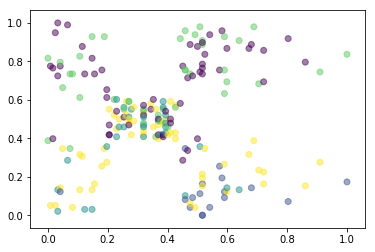

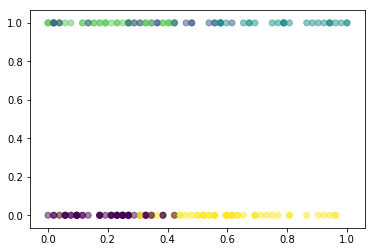

In [13]:
plt.scatter(r['Annual Income (k$)'],r['Spending Score (1-100)'],c=r['predict'],alpha=0.5)
plt.show()
plt.scatter(r['Age'],r['Gender'],c=r['predict'],alpha=0.5)
plt.show()
# 음 gendder로 확실히 분리된 것을 볼 수 있고 age로도 많이 분류됨을 볼 수 있다. income이나 score도 어느정도 영향력을 가지고 있는 것을 볼 수 있다.

# 2-3 DBSCAN

In [14]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.3,min_samples=6)

predict = pd.DataFrame(model.fit_predict(scaledData))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([scaledData,predict],axis=1)
print(r['predict'].value_counts())
print(r)

 1    112
 0     83
-1      5
Name: predict, dtype: int64
     Gender       Age  Annual Income (k$)  Spending Score (1-100)  predict
0       1.0  0.019231            0.000000                0.387755        0
1       1.0  0.057692            0.000000                0.816327        0
2       0.0  0.038462            0.008197                0.051020        1
3       0.0  0.096154            0.008197                0.775510        1
4       0.0  0.250000            0.016393                0.397959        1
5       0.0  0.076923            0.016393                0.765306        1
6       0.0  0.326923            0.024590                0.051020        1
7       0.0  0.096154            0.024590                0.948980        1
8       1.0  0.884615            0.032787                0.020408       -1
9       0.0  0.230769            0.032787                0.724490        1
10      1.0  0.942308            0.032787                0.132653       -1
11      0.0  0.326923            0.032787 

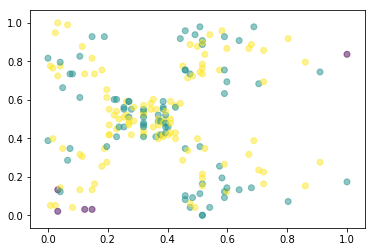

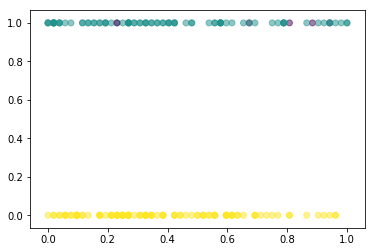

In [15]:
plt.scatter(r['Annual Income (k$)'],r['Spending Score (1-100)'],c=r['predict'],alpha=0.5)
plt.show()
plt.scatter(r['Age'],r['Gender'],c=r['predict'],alpha=0.5)
plt.show()
# 음 gendder로 확실히 분리된 것을 볼 수 있고 age로도 많이 분류됨을 볼 수 있다. income이나 score도 어느정도 영향력을 가지고 있는 것을 볼 수 있다.

# 성능 평가
### 정답값이 없어 label predict비교는 못하고
### 실루엣만 측정해 보겠다.

In [16]:
# 우선 모든 데이터 쌍  (i,j) 에 대해 거리(distance) 혹은 비유사도(dissimilarity)을 구한다. 이 결과를 이용하여 모든 데이터  i 에 대해 다음 값을 구한다.
# ai  :  i 와 같은 클러스터에 속한 원소들의 평균 거리
# bi  :  i 와 다른 클러스터 중 가장 가까운 클러스터까지의 평균 거리
# bi - ai / max(ai,bi)의 합
# 높을수록 좋다. bi가 클수록 음수가 되기 때문이다.

from sklearn.metrics import silhouette_samples
KmeansSilhouetteList = list()
DBSCANSilhouetteList = list()

# 하이퍼 파라미터 변경해가며 해보기
for k in range(2, 10):
    # KMeans    
    model1 = KMeans(n_clusters=k,algorithm='auto')
    predict = pd.DataFrame(model1.fit_predict(scaledData))
    predict.columns=['predict']
    r1 = pd.concat([scaledData,predict],axis=1)
    sample_silhouette_values1 = silhouette_samples(scaledData, r1['predict']).copy()    
    KmeansSilhouetteList.append(sample_silhouette_values1.mean())
    
for k in range(2, 10):
    # DBSCAN
    model2 = DBSCAN(eps=(0.1*k), min_samples=6)
    r2 = pd.concat([scaledData,predict],axis=1)
    predict = pd.DataFrame(model2.fit_predict(scaledData))
    predict.columns=['predict']
    sample_silhouette_values2 = silhouette_samples(scaledData, r2['predict']).copy()
    DBSCANSilhouetteList.append(sample_silhouette_values2.mean())

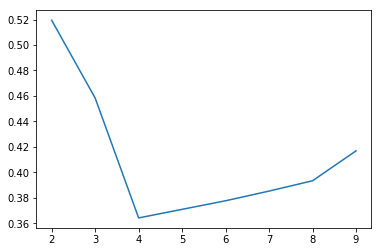

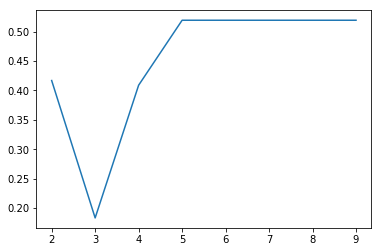

[0.5194624832665107, 0.45835255811254244, 0.36416575223390624, 0.37089464698896935, 0.3776415902227895, 0.3852474788768381, 0.39335034356438164, 0.4168572282350894]
[0.4168572282350894, 0.18301328692671295, 0.4088779472796057, 0.5194624832665107, 0.5194624832665107, 0.5194624832665107, 0.5194624832665107, 0.5194624832665107]


In [17]:
plt.plot(range(2, 10), KmeansSilhouetteList)
plt.show()
plt.plot(range(2, 10), DBSCANSilhouetteList)
plt.show()
# kmeans나 dbscan이나 비슷한 성능을 보임을 알 수 있고
# kmeans는 군집의 개수가 2일때가 제일 높은 실루엣을 가지고 있다.
# dbscan은 0.5 epoch이상일때 제일 높은 실루엣을 가지고 있다.
print(KmeansSilhouetteList)
print(DBSCANSilhouetteList)